# Digit Recognizer

## Load Modules

In [73]:
# Data Manipulation
import pandas as pd
pd.options.display.max_columns = 50
from IPython.display import display
import numpy as np

# Visualization
import matplotlib.pyplot as plt
#import seaborn as sns

# Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb
from sklearn.decomposition import PCA

## Load Data

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)

## Explore Shape of Data

In [4]:
train_df.shape

(42000, 785)

In [5]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,...,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
train_df.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,...,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


### Missing Values

In [11]:
train_df[train_df.isnull().any(axis=1)]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,...,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783


## Visualize

Show what a number looks like using imshow. 

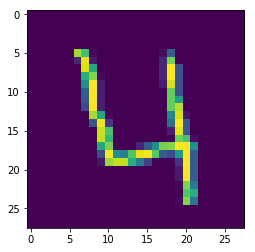

In [24]:
# Get the shape of the data, then reshape it into a square
first_number = train_df.iloc[3, 1:].values
first_number = first_number.reshape((28,28))
first_number
plt.imshow(first_number)
plt.show()

### Todo:
Display a 10x10 sample of digits.

## Model

1. Split into train and test
2. Fit
3. Predict
4. Measure Accuracy

### Using All Features

In [77]:
X = train_df.drop('label', axis=1)
Y = train_df.label

x_train, x_test, y_train, y_test = train_test_split(
    X, 
    Y, 
    test_size = .2,
    random_state = 42,
)

#### Random Forest

In [30]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
pred = forest.predict(x_test)

print "Accuracy Score:"
print accuracy_score(pred, y_test)

Accuracy Score:
0.94


#### XGBoost (slowwww)

In [71]:
xgb_clf = xgb.XGBClassifier(seed=42)
xgb_clf.fit(x_train, y_train)
xgb_pred = xgb_clf.predict(x_test)
print accuracy_score(y_test, xgb_pred)

0.933333333333


### Dimensionality Reduction with PCA

In [79]:
for n_component in [10, 20, 30, 40, 50, 80, 100]:
    pca = PCA(n_components=n_component, random_state=42)
    pca.fit(X)
    X_PCA = pca.transform(X)

    x_pca_train, x_pca_test, y_pca_train, y_pca_test = train_test_split(
        X_PCA, 
        Y, 
        test_size = .2,
        random_state = 42,
    )

    forest = RandomForestClassifier()
    forest.fit(x_pca_train, y_pca_train)
    pred = forest.predict(x_pca_test)
    
    print "Number of Components:", n_component
    print "Accuracy Score:"
    print accuracy_score(pred, y_pca_test)

Number of Components: 10
Accuracy Score:
0.885119047619
Number of Components: 20
Accuracy Score:
0.914404761905
Number of Components: 30
Accuracy Score:
0.914761904762
Number of Components: 40
Accuracy Score:
0.916785714286
Number of Components: 50
Accuracy Score:
0.9175
Number of Components: 80
Accuracy Score:
0.899285714286
Number of Components: 100
Accuracy Score:
0.892976190476


## Confusion Matrix Heatmaps

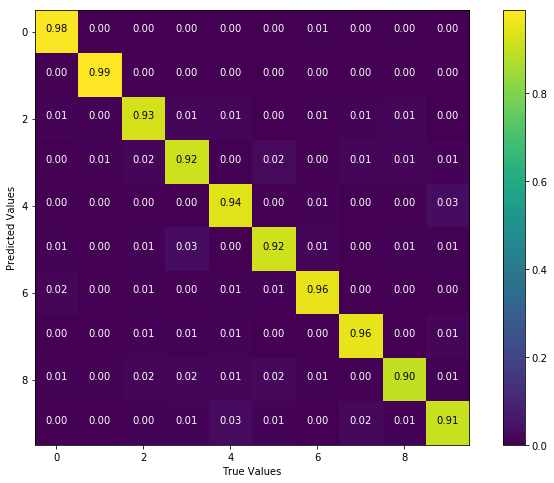

In [48]:
import itertools
conf_matrix = confusion_matrix(y_test, pred)
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(12,8))
plt.imshow(conf_matrix, cmap = 'viridis')
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(
        j, 
        i, 
        format(conf_matrix[i, j], '.2f'), 
        horizontalalignment='center',
        color='white' if conf_matrix[i,j] <.5 else 'black'
    )
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.colorbar()
plt.show()

In [42]:
train_df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

## 

In [61]:
import seaborn as sns

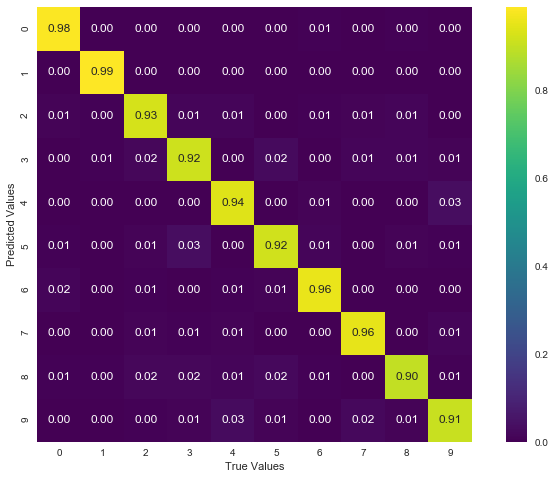

In [60]:
plt.figure(figsize=(12,8))
sns.heatmap(
    conf_matrix, 
    cmap='viridis', 
    annot=True, 
    fmt='.2f',
    square=True,
)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

In [62]:
def plot_conf_matrix(conf_matrix):
    plt.figure(figsize=(12,8))
    sns.heatmap(
        conf_matrix, 
        cmap='viridis', 
        annot=True, 
        fmt='.2f',
        square=True,
    )
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.show()

In [65]:
print classification_report(y_test,pred)

             precision    recall  f1-score   support

          0       0.95      0.98      0.97       816
          1       0.98      0.99      0.99       909
          2       0.93      0.93      0.93       846
          3       0.93      0.92      0.92       937
          4       0.93      0.94      0.93       839
          5       0.91      0.92      0.91       702
          6       0.96      0.96      0.96       785
          7       0.95      0.96      0.95       893
          8       0.94      0.90      0.92       835
          9       0.92      0.91      0.92       838

avg / total       0.94      0.94      0.94      8400



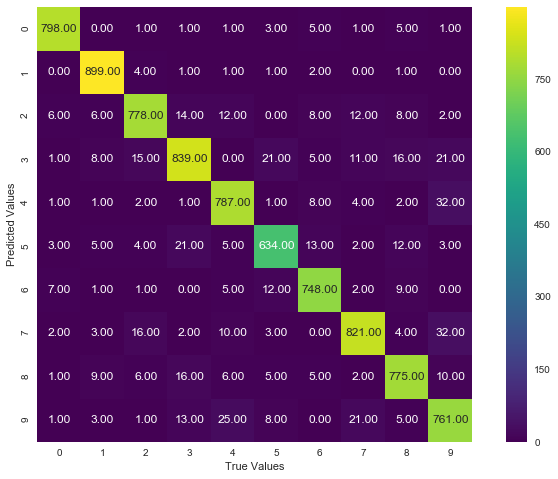

In [80]:
xgb_conf_matrix = confusion_matrix(y_test, xgb_pred)
plot_conf_matrix(xgb_conf_matrix)